In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense


data = pd.read_csv('/matches.csv')
#We removed columns that are not needed for the analysis to simplify the dataset
columns_to_drop = ['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'match report', 'notes', 'team', 'season']
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')

#this allow us to fill missing values in numerical columns with their mean values
data_cleaned = data_cleaned.fillna(data_cleaned.mean(numeric_only=True))

#We converted categorical variables to a one-hot encoded format, excluding the target column 'result'
#why?
#many machine learning algorithms cannot work directly with categorical data. They require numerical input. One-hot encoding converts categorical variables into a binary (0 or 1) format, which makes them suitable for these algorithms
data_encoded = pd.get_dummies(data_cleaned.drop(columns=['result'], errors='ignore'))

#We added the 'result' column back to the encoded dataset
#It ensures that the target variable remains correctly associated with the preprocessed dataset (data_encoded). This step is essential for maintaining data integrity and ensuring the interpretability of model predictions in machine learning applications
data_encoded['result'] = data_cleaned['result']

#We encoded the target variable 'result' into numerical labels.
#it ensures that the dataset (data_encoded) is ready to be used with various machine learning algorithms that expect numerical inputs
#it enables the correct training and evaluation of machine learning models by providing numerical labels that algorithms can understand and process effectively
#it facilitates the interpretation of model predictions by preserving the mapping between original labels and their encoded representations
label_encoder = LabelEncoder()
data_encoded['result'] = label_encoder.fit_transform(data_encoded['result'])

#we created a dictionary to map the original target classes to their encoded labels
#after the model makes predictions, these predictions are in the form of numerical labels (e.g., 0, 1, 2). To understand what these numerical labels correspond to in the original dataset, we need a mapping back to the original class labels (e.g., 'win', 'loss', 'draw')
#creating this mapping helps verify that the encoding process has been correctly applied
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

#we separated the features and the target variable
#separation allows the model to learn the relationship between inputs and outputs
features = data_encoded.drop(columns=['result'])
target = data_encoded['result']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#we standardized the feature data to have a mean of 0 and a standard deviation of 1
#it performs better and converge faster when the input features are on a similar scale
#without normalization, features with larger scales could dominate the learning process
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#target variable to a one-hot encoded format for the neural network
#in multi-class classification one-hot encoding turns each label into a vector of zeros with a single one, indicating the class, so neutral network can understand and distinguish between different classes
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 output units for win, loss, draw


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_test, y_test))

#we evaluated the model on the test data to get the loss and accuracy
loss, accuracy = model.evaluate(X_test, y_test)


print(f"Accuracy: {accuracy}")
#predictions on the test data and convert the probabilities to class labels
#model.predict() generates predictions based on trained models, and predictions.argmax(axis=1) translates these predictions into discrete class labels
predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

#one-hot encoded test labels back to class labels
#y_test.argmax(axis=1) is necessary because it transforms one-hot encoded labels (y_test) into integer format (y_test_classes)
y_test_classes = y_test.argmax(axis=1)

#assessing how well the classification model performs across all classes
conf_matrix = confusion_matrix(y_test_classes, predicted_classes)
class_report = classification_report(y_test_classes, predicted_classes, target_names=[str(cls) for cls in label_encoder.classes_])


print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Label Mapping:\n", label_mapping)


Epoch 1/15
112/112 [==============================] - 1s 4ms/step - loss: 1.0055 - accuracy: 0.5140 - val_loss: 0.8828 - val_accuracy: 0.6403
Epoch 2/15
112/112 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.7129 - val_loss: 0.7475 - val_accuracy: 0.6906
Epoch 3/15
112/112 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.8380 - val_loss: 0.6485 - val_accuracy: 0.7338
Epoch 4/15
112/112 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.9127 - val_loss: 0.5610 - val_accuracy: 0.7770
Epoch 5/15
112/112 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9604 - val_loss: 0.5179 - val_accuracy: 0.7878
Epoch 6/15
112/112 [==============================] - 0s 3ms/step - loss: 0.1158 - accuracy: 0.9892 - val_loss: 0.4798 - val_accuracy: 0.8201
Epoch 7/15
112/112 [==============================] - 0s 3ms/step - loss: 0.0693 - accuracy: 0.9991 - val_loss: 0.4553 - val_accuracy: 0.8309
Epoch 

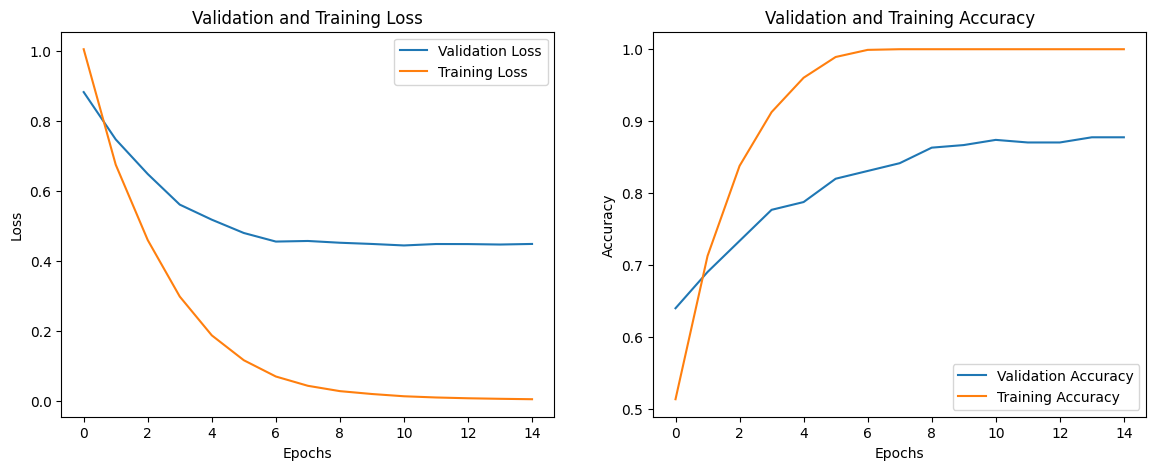

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation and Training Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation and Training Accuracy')
plt.legend()

plt.show()

In [ ]:

for col in features.columns:
    print(col)

gf
ga
xg
xga
poss
attendance
sh
sot
dist
fk
pk
pkatt
opponent_Arsenal
opponent_Aston Villa
opponent_Brentford
opponent_Brighton
opponent_Burnley
opponent_Chelsea
opponent_Crystal Palace
opponent_Everton
opponent_Fulham
opponent_Leeds United
opponent_Leicester City
opponent_Liverpool
opponent_Manchester City
opponent_Manchester Utd
opponent_Newcastle Utd
opponent_Norwich City
opponent_Sheffield Utd
opponent_Southampton
opponent_Tottenham
opponent_Watford
opponent_West Brom
opponent_West Ham
opponent_Wolves
captain_Aaron Cresswell
captain_Adam Lallana
captain_Adam Webster
captain_Aleksandar Mitrović
captain_Alexandre Lacazette
captain_Ashley Westwood
captain_Ben Foster
captain_Ben Gibson
captain_Ben Mee
captain_Billy Sharp
captain_Branislav Ivanović
captain_Bruno Fernandes
captain_Callum Wilson
captain_Christian Nørgaard
captain_Conor Coady
captain_Craig Cathcart
captain_Cristiano Ronaldo
captain_César Azpilicueta
captain_Dan Burn
captain_David McGoldrick
captain_Declan Rice
captain_Ezri